# Analysis of the “Movie IMBD Dataset"

#### Overview :

This project analyzes the “Movie IMBD Dataset” to uncover patterns and insights related to movie ratings, genres, budgets, and social media influence. The work involves data cleaning, preprocessing, exploratory data analysis, and visualization using Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly. By examining correlations, trends, and sentiment indicators, the project aims to highlight factors that contribute to a movie’s success and summarize actionable insights through clear visualizations and interpretations.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#from IPython.display import FileLink

# Save CSV
#data.to_csv("movie_metadata_duplicate.csv", index=False)

## 1. Data Loading and Initial Overview

##### Loading dataset

In [4]:
data = pd.read_csv("movie_metadata.csv")

##### Describing an overview of Dataset

In [5]:
#first 5 rows
print("=========First 5 rows==========")
data.head(5)

=========First 5 rows==========


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
#Shape of dataset
print("===========Number of rows and coloumns============")
print("\nNumber of rows  : ",data.shape[0])
print("Number of coloumns : ", data.shape[1])

===========Number of rows and coloumns============

Number of rows  :  5043
Number of coloumns :  28


In [7]:
#Info of rows and coloumns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
#Basic summary for numerical columns
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [9]:
#datatypes of each columns
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### Observations

The IMDb movie dataset contains 5,043 movies with 28 attributes, including details on directors, actors, genres, budgets, box office collections, and IMDb scores.
It combines categorical, numerical, and popularity metrics like Facebook likes.
This dataset is ideal for analyzing movie performance, audience sentiment, and industry trends.

## Data Pre-processing

#### Handling Duplicates

In [10]:
# Removing duplicate values

data = data.drop_duplicates()

# Shape after removing duplicates
print("===========Number of rows and coloumns============")
print("\nNumber of rows  : ",data.shape[0])
print("Number of coloumns : ", data.shape[1])


===========Number of rows and coloumns============

Number of rows  :  4998
Number of coloumns :  28


#### Handling Missing Values

In [11]:
# Missing Values
print("Number of missing values for each Column  \n","="*50,"\n",data.isna().sum())

Number of missing values for each Column  
 color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64


In [12]:
# Removing rows with missing values from less critical columns 
data.dropna(subset=["actor_3_facebook_likes"], inplace=True)
data.dropna(subset=["actor_2_facebook_likes"], inplace=True)
data.dropna(subset=["actor_1_facebook_likes"], inplace=True)

In [13]:
# Replacing rows with appropriate values
data["color"].fillna(data["color"].mode()[0] , inplace=True)     # replaced with mode value
data["director_name"].fillna("Unknown", inplace=True)
data["num_critic_for_reviews"].fillna(int(data["num_critic_for_reviews"].mean()) ,inplace=True)     # replaced with mean value 
data["duration"].fillna(data["duration"].mean() , inplace=True)      # replaced with mean value
data["director_facebook_likes"].fillna(0, inplace=True)       #replaced with 0 since Facebook likes naturally fit the idea that "no data" = "no likes"
data["gross"]=data.groupby("genres")["gross"].transform(lambda x:x.fillna(x.mean()))       #Fill missing 'gross' with the mean of its genre group
data["gross"].fillna(data["gross"].mean(), inplace=True)    # Backup plan for gross column 

data["actor_1_name"].fillna("Unknown",inplace=True)
data["actor_2_name"].fillna("Unknown",inplace=True)
data["actor_3_name"].fillna("Unknown",inplace=True)
data["facenumber_in_poster"].fillna(int(data["facenumber_in_poster"].mode()[0]),inplace=True)      # Replaced with mode value
data["plot_keywords"].fillna("Unknown",inplace=True)
data["num_user_for_reviews"].fillna(int(data["num_user_for_reviews"].mean()),inplace=True)
data["language"].fillna("Unknown",inplace=True)
data["country"].fillna("Unknown",inplace=True)
data["content_rating"].fillna("Not Rated",inplace=True)
data["budget"]=data.groupby("genres")["budget"].transform(lambda x: x.fillna(x.mean()))       #Fill missing 'budget' with the mean of its genre group
data["budget"].fillna(data["budget"].mean(), inplace=True)           # Backup plan for budget column 

data["title_year"].fillna(int(data["title_year"].mode()[0]),inplace=True)            # Replaced with mode value
data["aspect_ratio"].fillna(float(data["aspect_ratio"].mode()[0]),inplace=True)          # Replaced with mode value

#### Deriving New coloumns

In [14]:
#Deriving profit column

data["Profit"]=data["gross"]-data["budget"]

#Deriving decade column - to get the decade on film released

data["Decade"]= (data["title_year"]//10)*10

In [15]:
#Deriving Column Successfull/not - cost wise

data["Success_status"] = data.apply(lambda row: "Successful" if row["Profit"] > row["budget"] * 0.1 else "Loss",axis=1)   #considered as successful if profit is greater than 10% of budget

In [16]:
data.sample()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Decade,Success_status
1682,Color,Paul Haggis,239.0,133.0,549.0,343.0,Daniel Stern,10000.0,21129348.0,Crime|Drama|Romance|Thriller,...,PG-13,35000000.0,2010.0,796.0,7.4,2.35,27000,-13870652.0,2010.0,Loss


#### Filtering

In [17]:
#Recent movies 

recent_movies =data[data["title_year"]>2013]    #for 2013-2016 movies considered as recent
recent_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Decade,Success_status
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,PG-13,2.450000e+08,2015.0,393.0,6.8,2.35,85000,-4.492582e+07,2010.0,Loss
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,...,PG-13,2.500000e+08,2015.0,21000.0,7.5,2.35,118000,2.089916e+08,2010.0,Successful
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,3.302491e+08,Action|Adventure|Sci-Fi,...,PG-13,2.500000e+08,2016.0,4000.0,6.9,2.35,197000,8.024906e+07,2010.0,Successful
20,Color,Peter Jackson,422.0,164.0,0.0,773.0,Adam Brown,5000.0,2.551084e+08,Adventure|Fantasy,...,PG-13,2.500000e+08,2014.0,972.0,7.5,2.35,65000,5.108370e+06,2010.0,Loss
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,4.071973e+08,Action|Adventure|Sci-Fi,...,PG-13,2.500000e+08,2016.0,19000.0,8.2,2.35,72000,1.571973e+08,2010.0,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,Color,Kirk Loudon,3.0,95.0,0.0,279.0,Johnny Walter,883.0,4.346774e+07,Drama|Sci-Fi|Thriller,...,Not Rated,7.500000e+04,2014.0,507.0,5.0,2.35,87,4.339274e+07,2010.0,Successful
5012,Color,David Ayer,233.0,109.0,453.0,120.0,Martin Donovan,1000.0,1.049997e+07,Action|Crime|Drama|Thriller,...,R,3.500000e+07,2014.0,206.0,5.7,1.85,10000,-2.450003e+07,2010.0,Loss
5016,Color,Joseph Mazzella,140.0,90.0,0.0,9.0,Mikaal Bates,313.0,3.266586e+07,Crime|Drama|Thriller,...,Not Rated,2.500000e+04,2015.0,25.0,4.8,2.35,33,3.264086e+07,2010.0,Successful
5019,Color,Marcus Nispel,43.0,91.0,158.0,265.0,Brittany Curran,630.0,3.884903e+07,Horror|Mystery|Thriller,...,R,1.643410e+07,2015.0,512.0,4.6,1.85,0,2.241493e+07,2010.0,Successful


In [18]:
#Successfull Movies

Successful=data[data["Success_status"]=="Successful"]
Successful

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Decade,Success_status
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000,5.235058e+08,2000.0,Successful
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,PG-13,2.500000e+08,2012.0,23000.0,8.5,2.35,164000,1.981306e+08,2010.0,Successful
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,...,PG-13,2.580000e+08,2007.0,11000.0,6.2,2.35,0,7.853030e+07,2000.0,Successful
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,...,PG-13,2.500000e+08,2015.0,21000.0,7.5,2.35,118000,2.089916e+08,2010.0,Successful
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,...,PG,2.500000e+08,2009.0,11000.0,7.5,2.35,10000,5.195698e+07,2000.0,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Anthony Vallone,140.0,84.0,2.0,2.0,John Considine,45.0,2.281075e+07,Crime|Drama,...,PG-13,3.250000e+03,2005.0,44.0,7.8,2.35,4,2.280750e+07,2000.0,Successful
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,2.185859e+07,Comedy|Drama,...,Not Rated,1.478137e+07,2013.0,470.0,7.7,2.35,84,7.077218e+06,2010.0,Successful
5039,Color,Unknown,43.0,43.0,0.0,319.0,Valorie Curry,841.0,3.780378e+07,Crime|Drama|Mystery|Thriller,...,TV-14,3.286044e+07,2009.0,593.0,7.5,16.00,32000,4.943331e+06,2000.0,Successful
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,3.444259e+07,Drama|Horror|Thriller,...,Not Rated,1.400000e+03,2013.0,0.0,6.3,2.35,16,3.444119e+07,2010.0,Successful


In [19]:
#Movies with high IMBD score

High_rated = data[data["imdb_score"]>8]
High_rated

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Decade,Success_status
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,PG-13,2.500000e+08,2012.0,23000.0,8.5,2.35,164000,1.981306e+08,2010.0,Successful
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,6.232795e+08,Action|Adventure|Sci-Fi,...,PG-13,2.200000e+08,2012.0,21000.0,8.1,1.85,123000,4.032795e+08,2010.0,Successful
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,4.071973e+08,Action|Adventure|Sci-Fi,...,PG-13,2.500000e+08,2016.0,19000.0,8.2,2.35,72000,1.571973e+08,2010.0,Successful
43,Color,Lee Unkrich,453.0,103.0,125.0,721.0,John Ratzenberger,15000.0,4.149845e+08,Adventure|Animation|Comedy|Family|Fantasy,...,G,2.000000e+08,2010.0,1000.0,8.3,1.85,30000,2.149845e+08,2010.0,Successful
58,Color,Andrew Stanton,421.0,98.0,475.0,522.0,Fred Willard,1000.0,2.238069e+08,Adventure|Animation|Family|Sci-Fi,...,G,1.800000e+08,2008.0,729.0,8.4,2.35,16000,4.380689e+07,2000.0,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,Color,Majid Majidi,46.0,89.0,373.0,27.0,Amir Farrokh Hashemian,36.0,9.254020e+05,Drama|Family,...,PG,1.800000e+05,1997.0,35.0,8.5,1.85,0,7.454020e+05,1990.0,Successful
4924,Color,Cary Bell,140.0,78.0,0.0,0.0,Stacie Evans,0.0,5.746749e+06,Documentary,...,Not Rated,1.800000e+05,2014.0,0.0,8.7,2.35,88,5.566749e+06,2010.0,Successful
4937,Color,Bill Melendez,43.0,25.0,36.0,27.0,Bill Melendez,39.0,1.354330e+08,Animation|Comedy|Family,...,TV-G,1.500000e+05,1965.0,36.0,8.4,1.33,0,1.352830e+08,1960.0,Successful
4972,Color,Sut Jhally,16.0,80.0,3.0,0.0,Seth Ackerman,103.0,5.746749e+06,Documentary,...,Not Rated,7.000000e+04,2004.0,0.0,8.3,2.35,110,5.676749e+06,2000.0,Successful


#### Aggregating 

In [20]:
#Average IMBD score by Genre

avg_score_genres = data.groupby("genres")["imdb_score"].mean()
avg_score_genres

genres
Action                                                             5.972727
Action|Adventure                                                   6.770000
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             6.200000
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller    6.000000
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi              7.950000
                                                                     ...   
Sci-Fi|Thriller                                                    6.370000
Thriller                                                           5.326316
Thriller|War                                                       7.900000
Thriller|Western                                                   8.100000
Western                                                            6.583333
Name: imdb_score, Length: 910, dtype: float64

In [21]:
#Total gross collection - country wise

gross_by_country = data.groupby("country")["gross"].sum().sort_values(ascending=False)
gross_by_country

country
USA            1.980400e+11
UK             1.459280e+10
Canada         3.642970e+09
France         3.402603e+09
Germany        2.837204e+09
                   ...     
Kyrgyzstan     2.126511e+06
Afghanistan    1.127331e+06
Finland        6.117090e+05
Philippines    7.007100e+04
Georgia        1.714900e+04
Name: gross, Length: 64, dtype: float64

In [22]:
#Number of movies per Decade

num_of_movies_decade = data.groupby("Decade")["movie_title"].count()
num_of_movies_decade

Decade
1910.0       1
1920.0       5
1930.0      15
1940.0      24
1950.0      28
1960.0      72
1970.0     111
1980.0     287
1990.0     782
2000.0    2177
2010.0    1473
Name: movie_title, dtype: int64

#### Observations

The dataset was cleaned by handling duplicates and missing values using mean, mode, and group-wise replacement. New columns like Profit, Decade, and Success Status gave insights into financial trends and movie success. Filtering and aggregation further revealed patterns in genres, countries, and decades, highlighting profitability and audience preferences.

## Exploratory Data Analysis (EDA) & Visualization

### *1.Distribution of imdb scores*

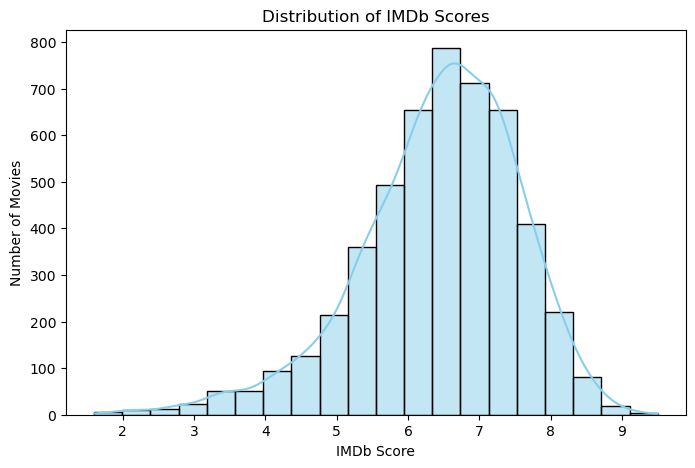

IMDb Score Summary:
count    4975.000000
mean        6.439377
std         1.123562
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data["imdb_score"], bins=20, kde=True,color="skyblue")
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Movies")
plt.show()

# Statistical summary
print("IMDb Score Summary:")
print(data["imdb_score"].describe())


#### *Insights*

Most movies cluster between 6 and 8.

Very few movies have scores below 4 or above 9.

Distribution is slightly left-skewed (more mid-rated movies than very low-rated).

### *2. Movie Duration Distribution*

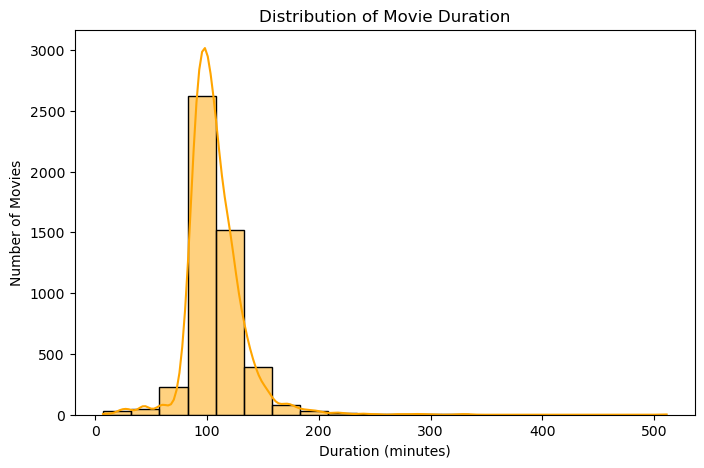

Duration Summary:
count    4975.000000
mean      107.311165
std        25.158762
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64


In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data["duration"], bins=20, kde=True, color="orange")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

# Statistical summary
print("Duration Summary:")
print(data["duration"].describe())


#### *Insights*

Most movies run between 90–150 minutes, with a clear concentration around ~120 minutes. A few outliers are much longer or shorter.

### *3. Budget Distribution*

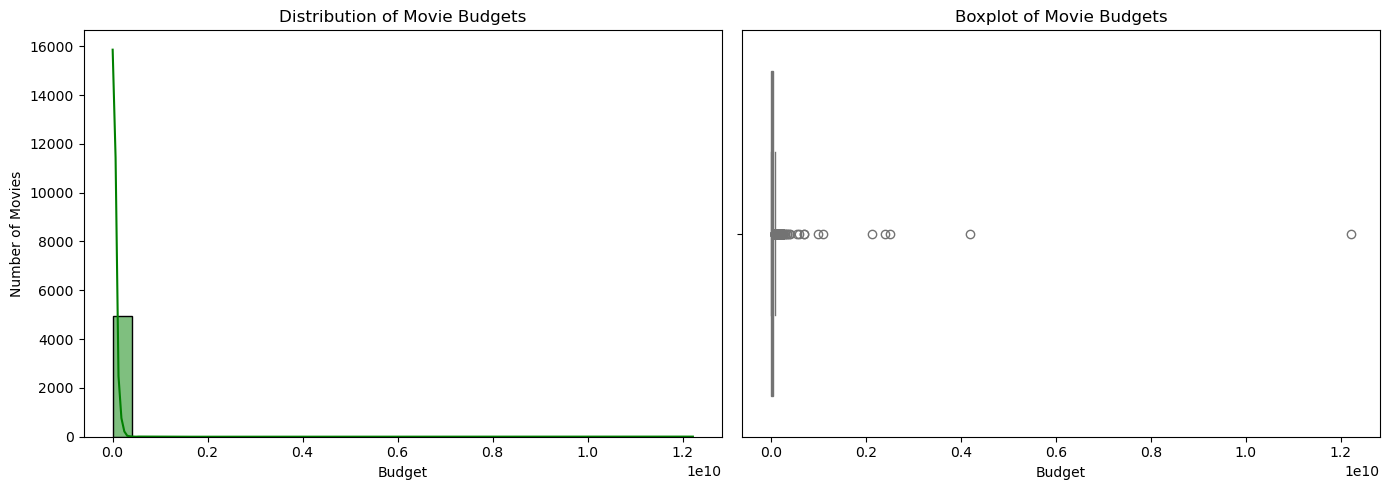

Budget Summary:
count    4.975000e+03
mean     3.877705e+07
std      1.973383e+08
min      2.180000e+02
25%      7.000000e+06
50%      2.000000e+07
75%      4.000000e+07
max      1.221550e+10
Name: budget, dtype: float64


In [25]:
plt.figure(figsize=(14,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data["budget"], bins=30, kde=True, color="green")
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget")
plt.ylabel("Number of Movies")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=data["budget"], color="lightgreen")
plt.title("Boxplot of Movie Budgets")
plt.xlabel("Budget")

plt.tight_layout()
plt.show()



# Statistical summary
print("Budget Summary:")
print(data["budget"].describe())


#### *Insights*

Most movies have relatively low to mid-range budgets, while a few blockbusters with extremely high budgets create strong right skewness in the distribution, as clearly visible from the histogram and the long tail with outliers in the boxplot.

### *4. Gross Revenue Distribution*

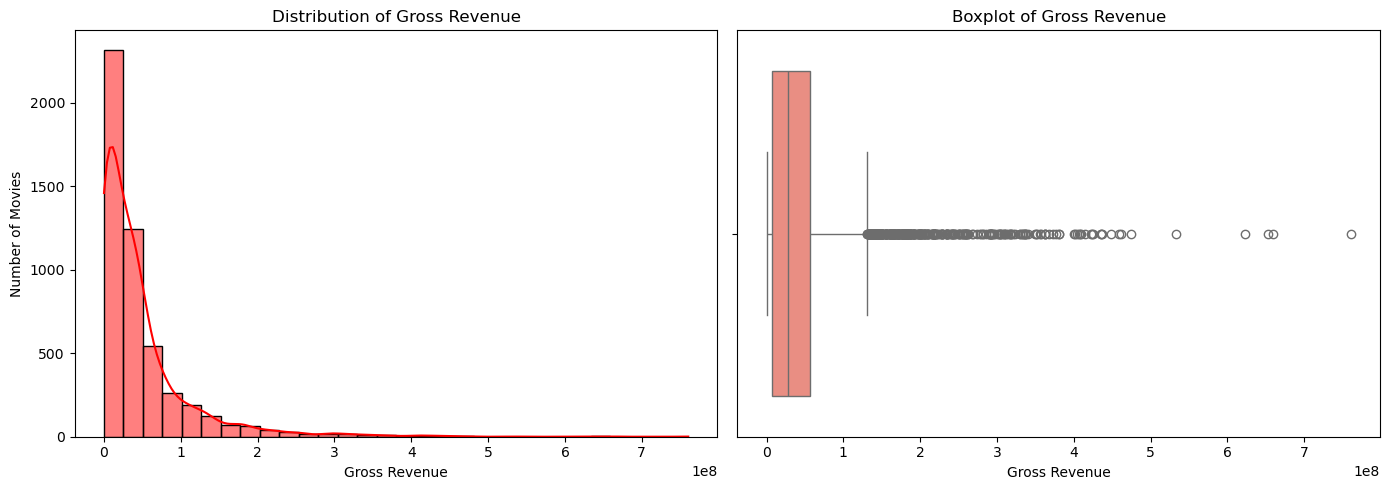

In [26]:
plt.figure(figsize=(14,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data["gross"], bins=30, kde=True, color="red")
plt.title("Distribution of Gross Revenue")
plt.xlabel("Gross Revenue")
plt.ylabel("Number of Movies")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=data["gross"], color="salmon")
plt.title("Boxplot of Gross Revenue")
plt.xlabel("Gross Revenue")

plt.tight_layout()
plt.show()


#### *Insights*

Gross revenue is highly skewed, with most films earning modest amounts while a small number of blockbusters generate extremely high revenues, creating long tails and many outliers.

### *5. Budget Vs Gross Revenue Analysis*

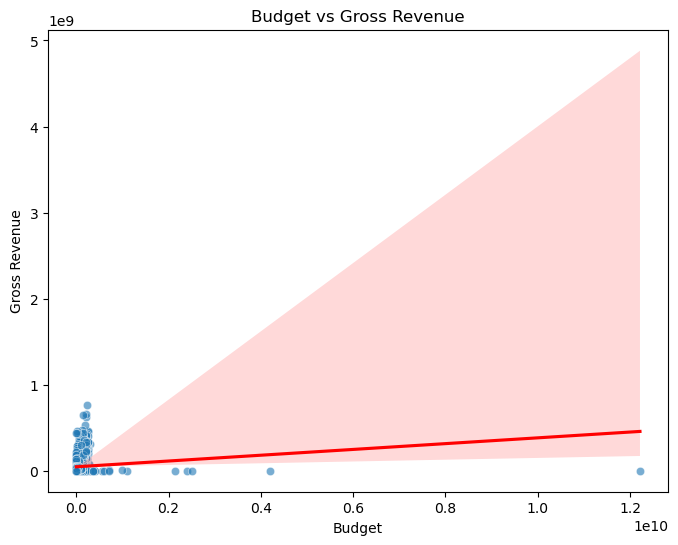

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="budget", y="gross", data=data, alpha=0.6)
sns.regplot(x="budget", y="gross", data=data, scatter=False, color="red")  # trendline
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.show()


#### *Insights*

There is a positive correlation between budget and gross revenue, meaning higher investments generally lead to higher returns, though there are many exceptions.

### *6.IMDb Score vs Gross Revenue*

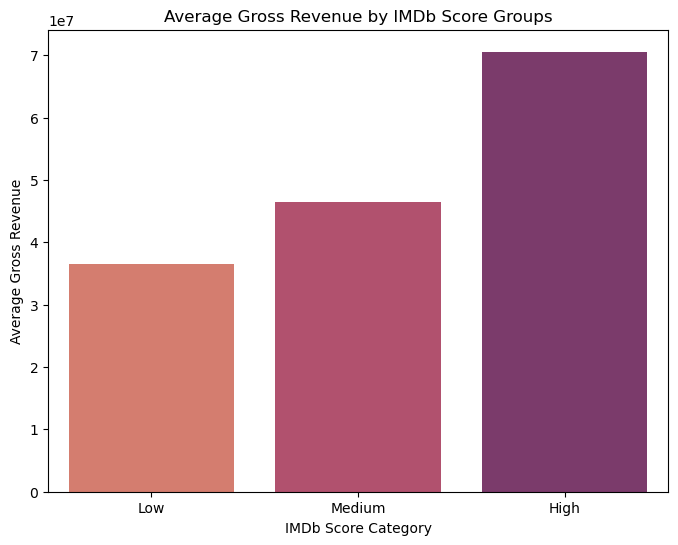

In [28]:
data["score_group"] = pd.cut(data["imdb_score"], bins=[0,6,7.5,10], labels=["Low","Medium","High"])
plt.figure(figsize=(8,6))
sns.barplot(x="score_group", y="gross", data=data, estimator="mean", ci=None, palette="flare")
plt.title("Average Gross Revenue by IMDb Score Groups")
plt.xlabel("IMDb Score Category")
plt.ylabel("Average Gross Revenue")
plt.show()


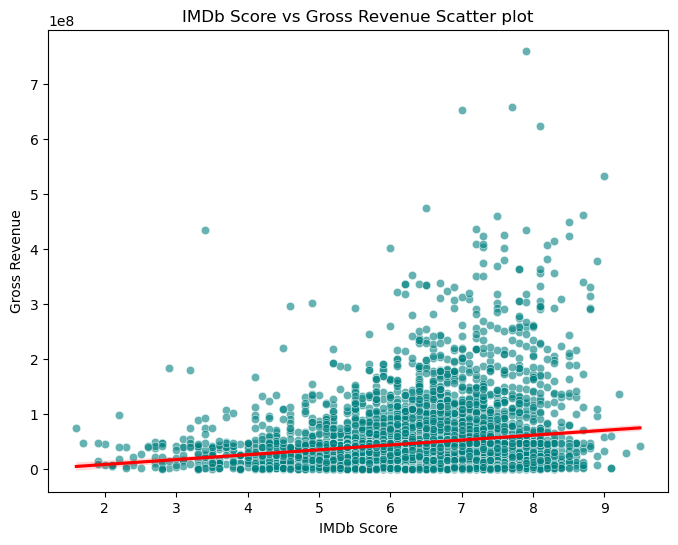

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="imdb_score", y="gross", data=data, alpha=0.6, color="teal")
sns.regplot(x="imdb_score", y="gross", data=data, scatter=False, color="red")  # trendline
plt.title("IMDb Score vs Gross Revenue Scatter plot")
plt.xlabel("IMDb Score")
plt.ylabel("Gross Revenue")
plt.show()


#### *Insights*

Movies with higher IMDb scores tend to earn better gross revenue, but the relationship is not very strong, suggesting that commercial success depends on more than just ratings.

### *7. Number of Movies by Genre*

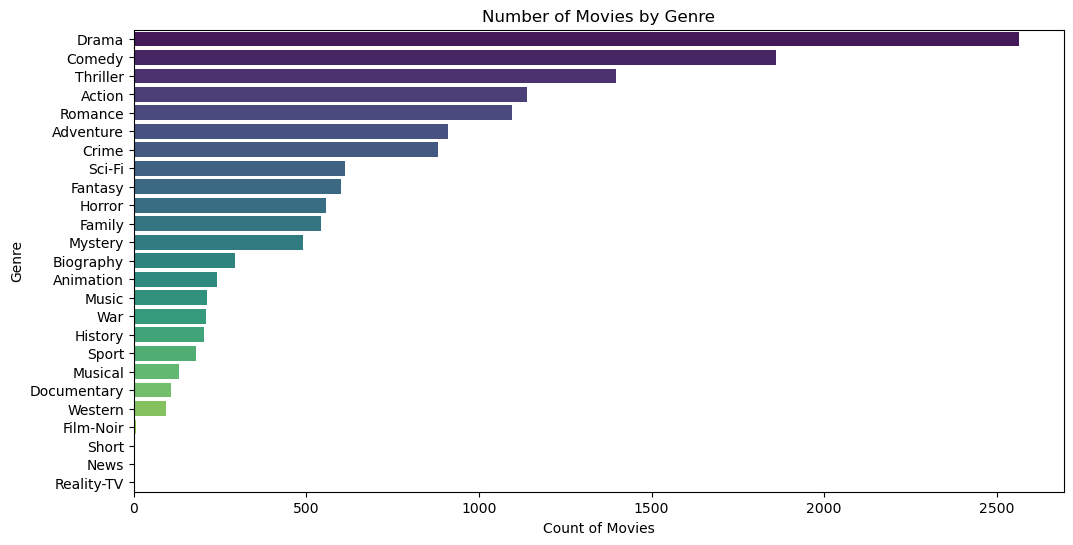

In [30]:
# Split genres into separate rows
genres_split = data['genres'].str.split('|').explode()

# Count frequency of individual genres
genre_counts = genres_split.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Number of Movies by Genre")
plt.xlabel("Count of Movies")
plt.ylabel("Genre")
plt.show()

#### *Insights*

The dataset shows a clear dominance of Drama, Comedy, and Action, highlighting them as the most frequently produced genres.
In contrast, genres like Western, Musical, and Film-Noir are underrepresented, indicating a highly imbalanced genre distribution.

### *8. Movie Duration influence IMDb score ?*

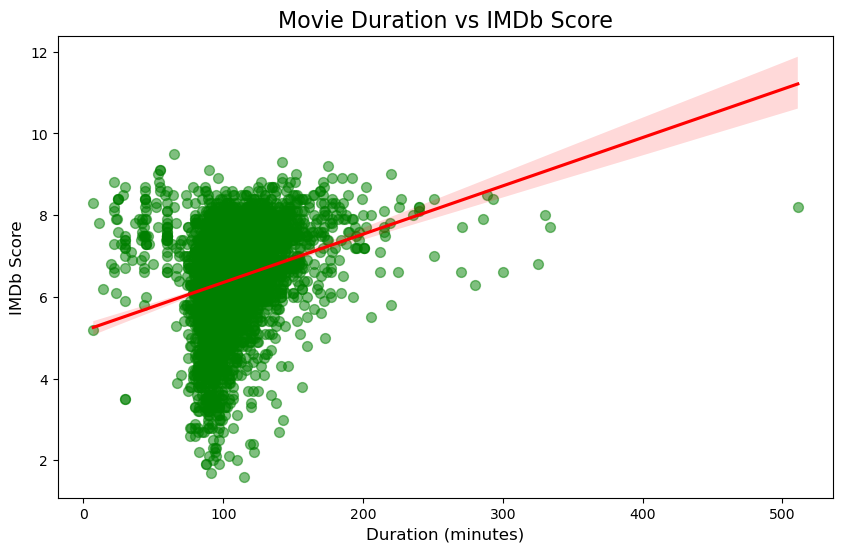

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='duration', y='imdb_score', data=data, scatter_kws={'s': 50, 'alpha': 0.5,'color': 'green'}, line_kws={'color': 'red'})
plt.title('Movie Duration vs IMDb Score', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('IMDb Score', fontsize=12)
plt.show()

#### *Insights*

Looking at your figure, the regression line does show a slight upward trend, but the majority of points are densely clustered around 80–150 minutes and IMDb scores of 5–8. This means:

The overall trend is weak, and movie duration alone doesn’t strongly determine ratings.

Most movies, regardless of length, receive similar IMDb scores, so other factors likely play a bigger role.

### *9. Movies per Year (Trend Over Time)*

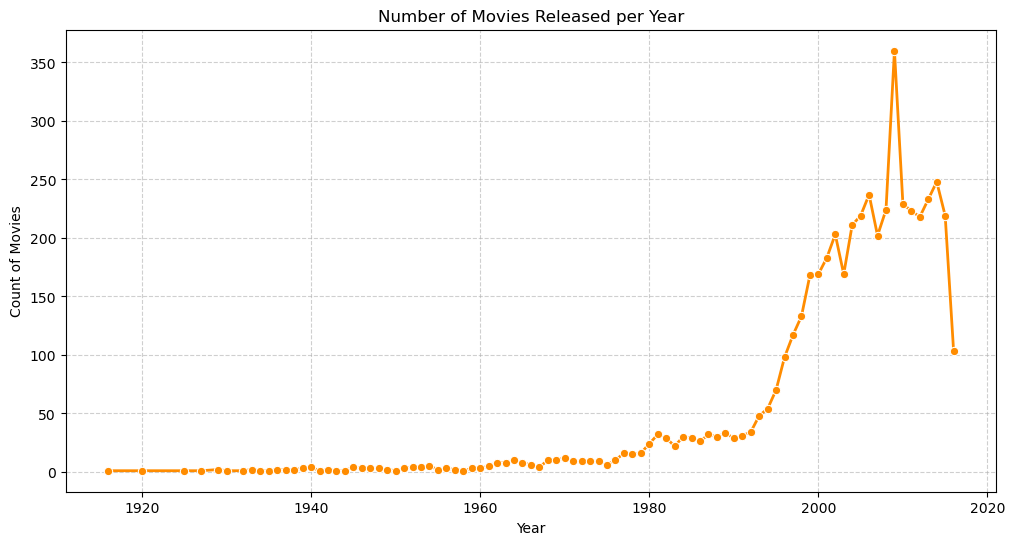

In [32]:
# Movies released per year
movies_by_year = data.groupby("title_year")["movie_title"].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="title_year", y="movie_title", data=movies_by_year, marker="o", linewidth=2, color="darkorange" )
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


#### *Insights*

The timeline shows a sharp increase in the number of movies produced after 1980, indicating a boom in the film industry, likely driven by technological advancements, globalization, and higher audience demand.

### *10. Budget vs Gross Revenue vs IMDb Score*

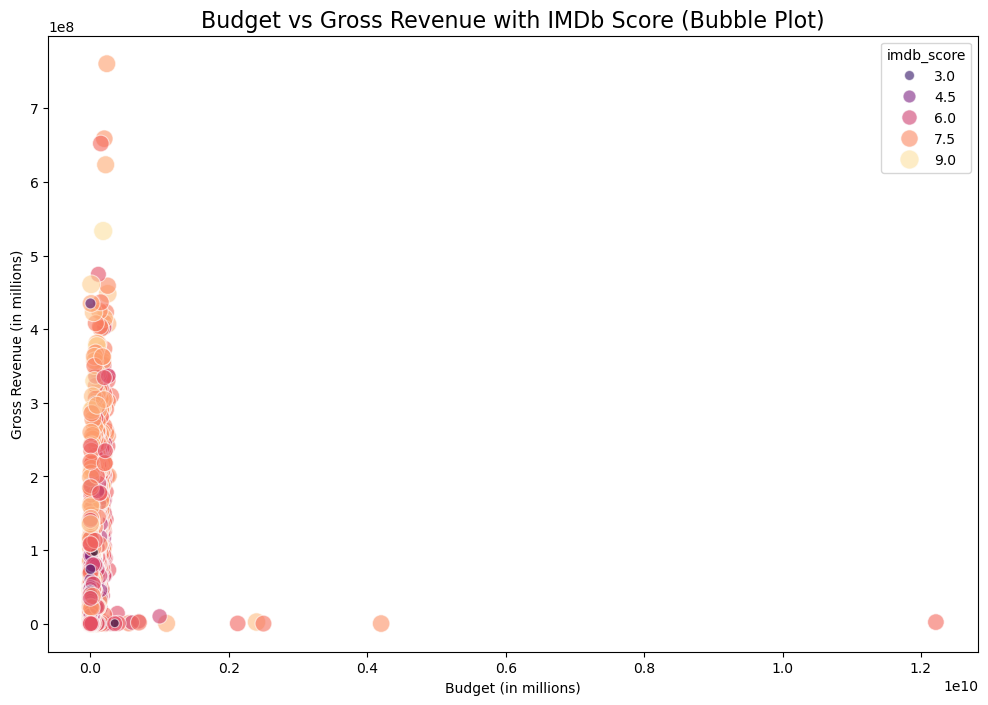

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data, 
    x='budget', 
    y='gross', 
    hue='imdb_score', 
    size='imdb_score', 
    palette='magma', 
    sizes=(20, 200), 
    alpha=0.6
)
plt.title("Budget vs Gross Revenue with IMDb Score (Bubble Plot)", fontsize=16)
plt.xlabel("Budget (in millions)")
plt.ylabel("Gross Revenue (in millions)")
#plt.legend(title="IMDb Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### *Insights*

Movies with higher budgets generally achieve higher gross revenues, but the spread shows some high-grossing films even with modest budgets.
IMDb scores don’t strongly determine revenue, but higher-rated movies (lighter colors) cluster more in the successful gross range.

### *11.Genre vs IMDb Score vs Gross (violin plot grouped by genre with revenue overlay).*

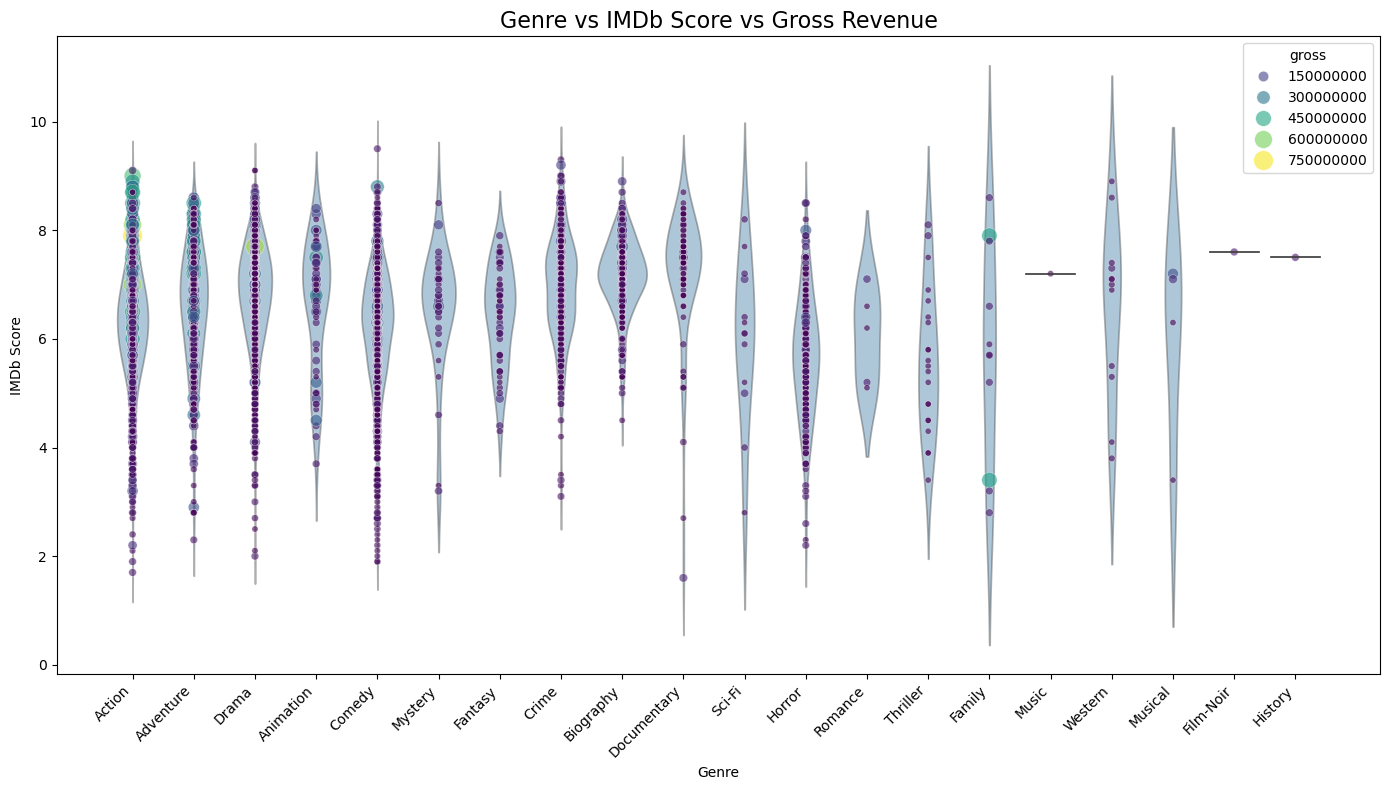

In [34]:
# Add main genre column (take first listed genre)
data['main_genre'] = data['genres'].apply(lambda x: x.split('|')[0])

plt.figure(figsize=(14, 8))

# Violin plot for IMDb scores grouped by genre
sns.violinplot(
    data=data, x="main_genre", y="imdb_score",
    inner=None, alpha=0.4
)

# Overlay scatter plot to show gross revenue influence
sns.scatterplot(
    data=data, x="main_genre", y="imdb_score",
    size="gross", hue="gross",
    palette="viridis", sizes=(20, 200),
    alpha=0.6, legend=True
)

plt.xticks(rotation=45, ha="right")
plt.title("Genre vs IMDb Score vs Gross Revenue", fontsize=16)
plt.xlabel("Genre")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.show()


#### *Insights*

Genres like Biography and Documentary tend to have higher average IMDb scores, showing strong critical appreciation.
Action and Adventure films dominate gross revenue despite more spread-out ratings, highlighting their commercial appeal.

## *Groupby & Pivot Analysis*

### *12.Average IMDb score per genre.*

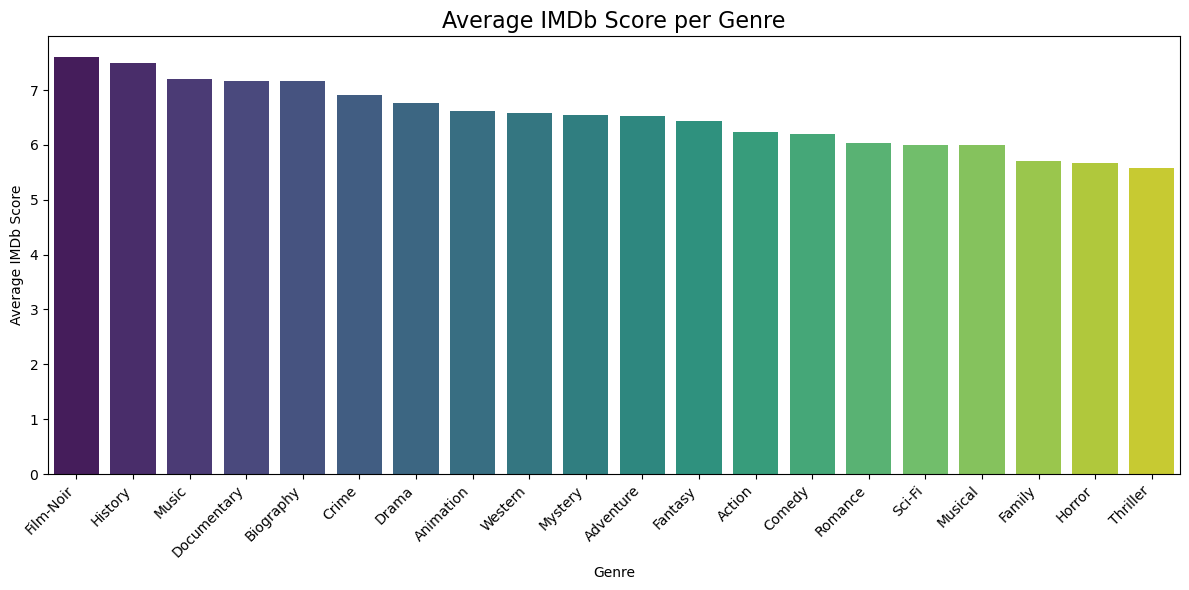

In [35]:
# Group by main genre and calculate average IMDb score
avg_scores = data.groupby(
    data['genres'].apply(lambda x: x.split('|')[0])
)['imdb_score'].mean().reset_index()

# Rename columns for clarity
avg_scores.columns = ['main_genre', 'avg_imdb_score']

# Sort by score for better visualization
avg_scores = avg_scores.sort_values(by='avg_imdb_score', ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_scores, x='main_genre', y='avg_imdb_score',
    palette="viridis"
)

plt.xticks(rotation=45, ha="right")
plt.title("Average IMDb Score per Genre", fontsize=16)
plt.xlabel("Genre")
plt.ylabel("Average IMDb Score")
plt.tight_layout()
plt.show()


#### *Insights*

The chart shows that smaller, more artistic genres like Film-Noir and History get the highest average IMDb scores, meaning audiences and critics like them a lot. More popular, entertainment-focused genres like Horror, Family, and Thriller usually have lower ratings, showing that being popular doesn’t always mean being highly rated.

### *13. Average IMDb Score per Decade & Number of movies per decade*

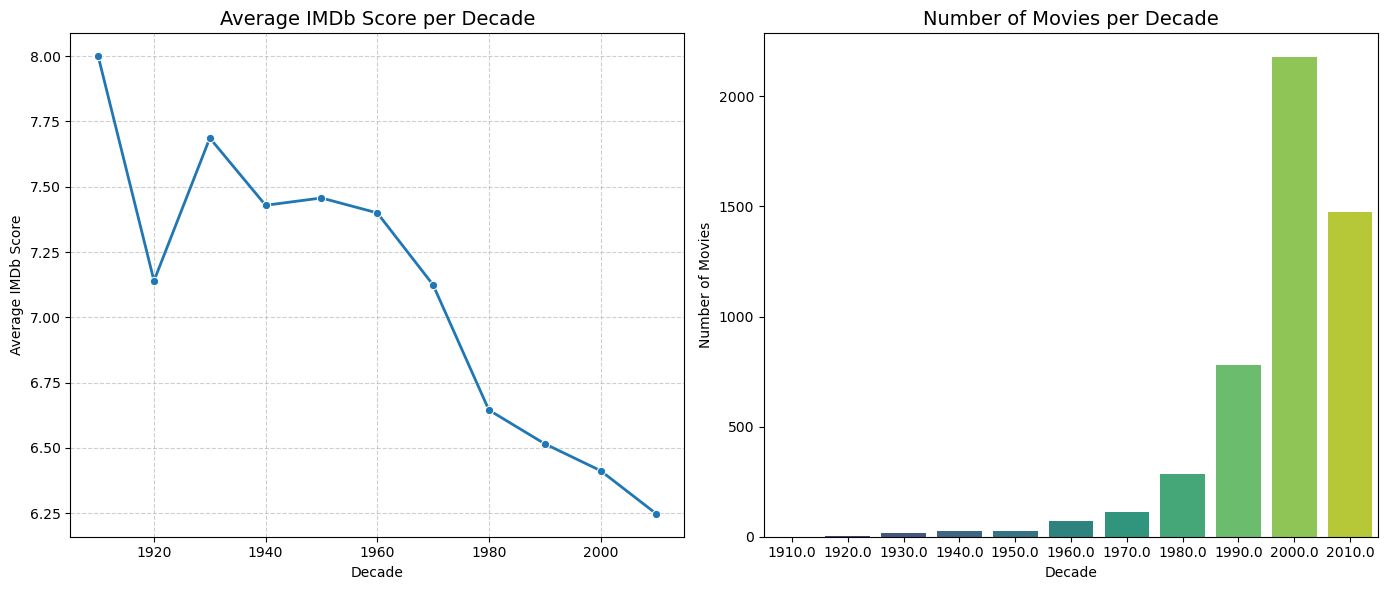

In [36]:
# Group by decade for average IMDb score
avg_decade = data.groupby('Decade')['imdb_score'].mean().reset_index()

# Group by decade for movie counts
count_decade = data['Decade'].value_counts().reset_index()
count_decade.columns = ['Decade', 'movie_count']
count_decade = count_decade.sort_values(by='Decade')

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

# --- Plot 1: Average IMDb score per decade ---
sns.lineplot(
    data=avg_decade, x='Decade', y='imdb_score',
    marker="o", linewidth=2, ax=axes[0]
)
axes[0].set_title("Average IMDb Score per Decade", fontsize=14)
axes[0].set_xlabel("Decade")
axes[0].set_ylabel("Average IMDb Score")
axes[0].grid(True, linestyle="--", alpha=0.6)

# --- Plot 2: Number of movies per decade ---
sns.barplot(
    data=count_decade, x='Decade', y='movie_count',
    palette="viridis", ax=axes[1]
)
axes[1].set_title("Number of Movies per Decade", fontsize=14)
axes[1].set_xlabel("Decade")
axes[1].set_ylabel("Number of Movies")

plt.tight_layout()
plt.show()


#### *Insights*

The average IMDb score has declined over time, dropping steadily from ~8.0 in the 1910s to nearly 6.2 in the 2010s.

Meanwhile, the number of movies produced per decade has exploded, especially after the 1980s, suggesting quantity has grown at the cost of average quality.

### *14. Correlation heatmap of numeric features (budget, gross, duration, IMDb score, votes).*

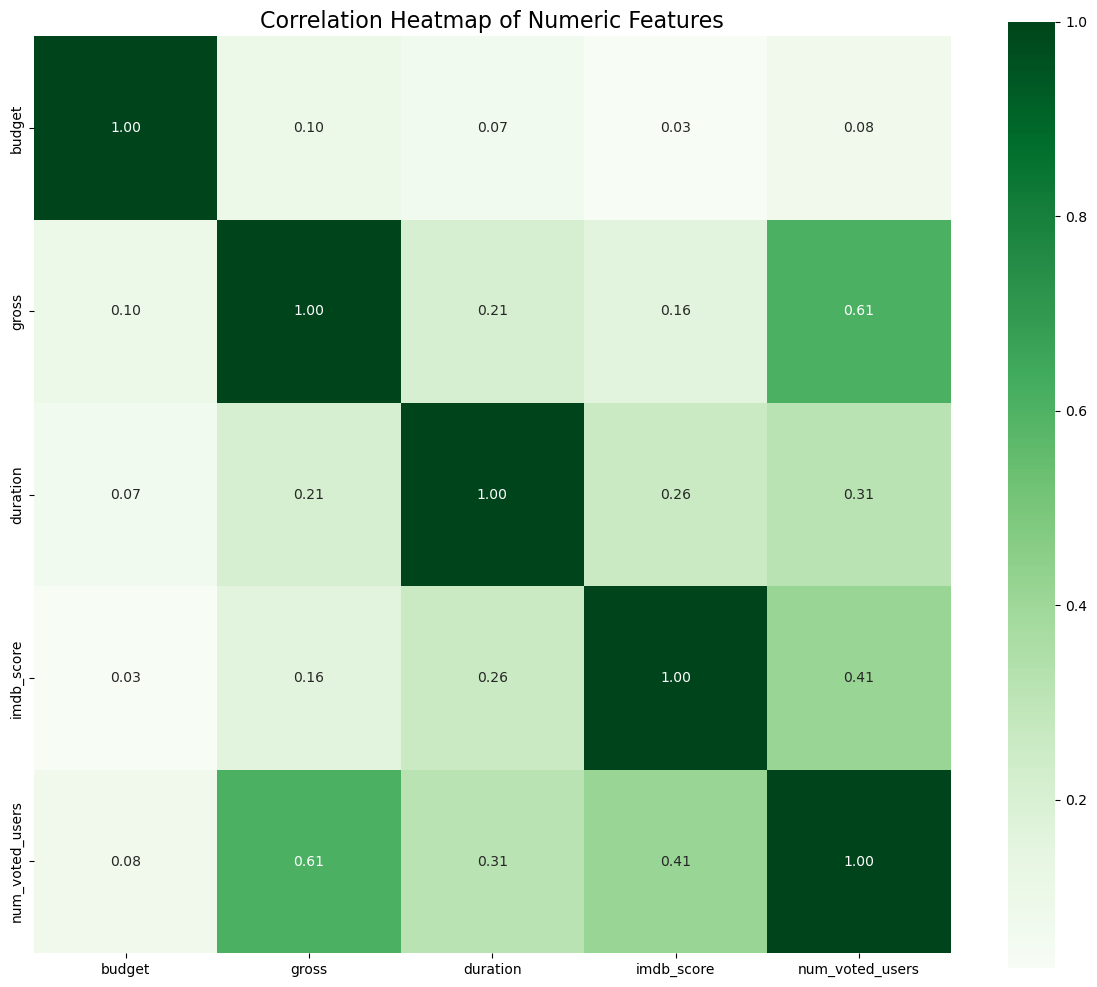

In [37]:
# Select numeric features for correlation analysis
numeric_features = data[['budget', 'gross', 'duration', 'imdb_score', 'num_voted_users']]

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap with larger figure size and green shades
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, annot=True, cmap="Greens",
    fmt=".2f", cbar=True, square=True
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


#### *Insights*

High correlations appear between gross revenue and number of votes, showing that popular movies usually earn more.
Meanwhile, budget has little correlation with IMDb score or gross, suggesting bigger spending doesn’t guarantee success or higher ratings.

### *15. Pairplot Considering multiple numeric coloumns*

<Figure size 1000x800 with 0 Axes>

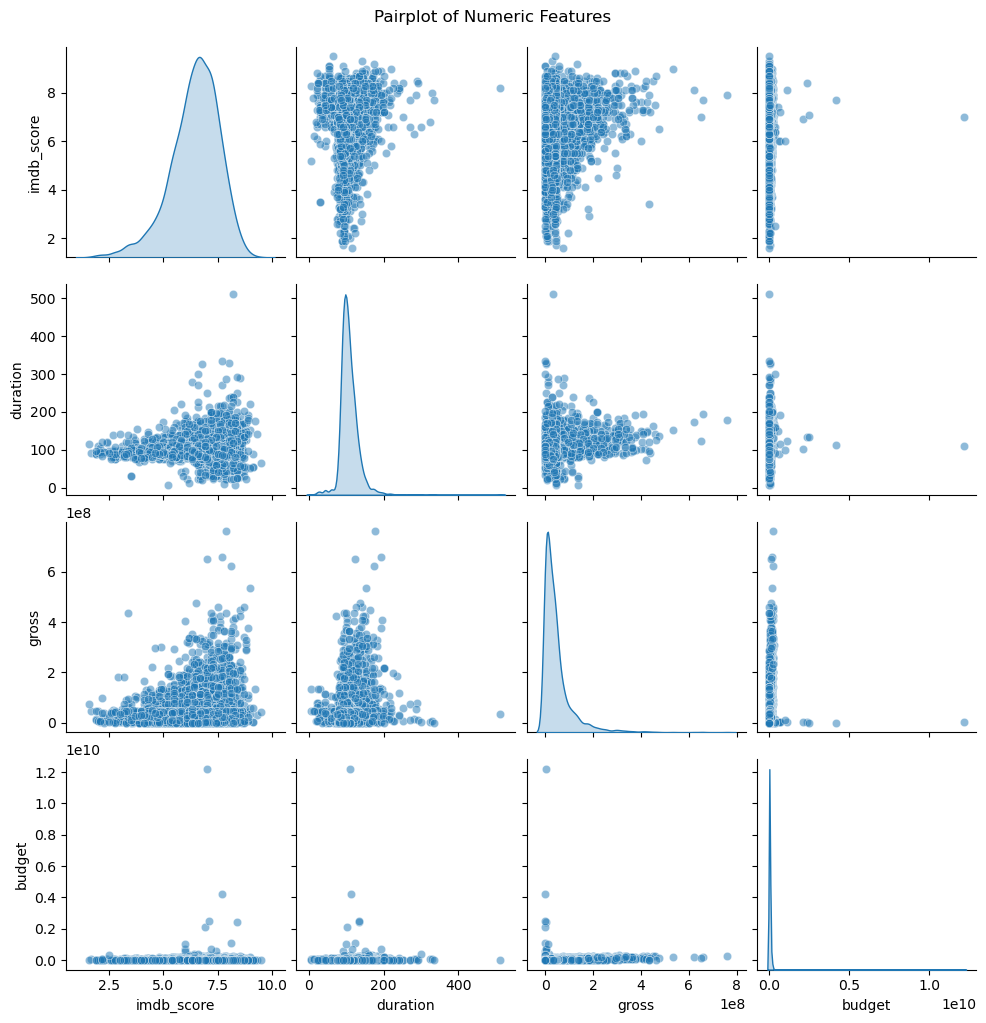

In [38]:
# Select a few numeric columns for pairplot
numeric_cols = ["imdb_score", "duration", "gross", "budget"]

plt.figure(figsize=(10, 8))
sns.pairplot(data[numeric_cols], diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

#### *Insights*

The pairplot shows a clear positive relationship between budget and gross revenue, indicating higher investments often lead to higher returns. IMDb scores, however, appear weakly related to budget or gross, suggesting ratings are less driven by financial factors.

## *Finaly Summary of Analysis*

This analysis of the IMDb movie dataset highlights several key insights into the factors influencing movie performance and audience ratings. Univariate and bivariate analyses revealed that IMDb scores generally cluster between 6 and 8, with movie durations most often ranging from 80 to 150 minutes. Budget and gross distributions showed wide disparities, indicating that only a small proportion of films achieve exceptionally high revenues despite large investments.

Exploring relationships among variables demonstrated that while higher budgets often correlate with higher grosses, a larger budget does not guarantee higher IMDb scores. Similarly, duration showed only a weak influence on ratings, suggesting that content quality and genre matter more than length. Genre analysis revealed that Action, Drama, and Comedy dominate the industry, though average ratings differ slightly across categories. Temporal analysis showed steady growth in the number of films produced over the years, reflecting industry expansion.

Multivariate and correlation studies further emphasized that commercial success (budget and gross) and audience ratings (IMDb score) are not perfectly aligned. External factors such as marketing reach, critical reviews, and star power likely contribute to outcomes beyond the dataset’s variables.

In conclusion, the project demonstrates that while budget and popularity are important for commercial success, they are not definitive drivers of audience ratings. Creative storytelling, genre selection, and execution quality remain essential for critical acclaim, making success in the film industry a multifaceted outcome of financial, artistic, and cultural factors.
